In [1]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
from scipy.stats import *
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 1. Dataset Loading
df = pd.read_csv('data_cardiovascular_risk.csv')

In [3]:
# 2. Making copy of Raw Data
df_raw = df.copy()

In [4]:
# 3. Dataset First View
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
# 4. Dataset Rows & Columns count
rows, columns = df.shape


In [6]:
# 5. Dataset Information
info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [7]:
# 6. Duplicate Values
duplicate_values = df.duplicated().sum()

In [8]:
# 7. Missing Values/Null Values
missing_values = df.isnull().sum()

In [9]:
# Dataset Columns
columns = df.columns.tolist()

In [10]:
# Dataset Describe
describe = df.describe(include='all')

In [11]:
# Number of Numerical and Categorical Variables
numerical_variables = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_variables = df.select_dtypes(include=['object']).columns.tolist()

In [12]:
# Check Unique Values for each variable
unique_values = df.nunique()

In [13]:
# Creating a copy of Dataset
df_wrangled = df.copy()

df_wrangled.head()


,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [14]:
# Identifying columns with missing values
missing_values_columns = df_wrangled.columns[df_wrangled.isnull().any()].tolist()

missing_values_columns


['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']

In [15]:
# Impute missing values with median for these columns
for column in missing_values_columns:
    df_wrangled[column].fillna(df_wrangled[column].median(), inplace=True)

# Check if there are still any missing values left
df_wrangled.isnull().sum()


id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [16]:
# Label encoding for 'sex' and 'is_smoking'
df_wrangled['sex'] = df_wrangled['sex'].map({'M': 1, 'F': 0})
df_wrangled['is_smoking'] = df_wrangled['is_smoking'].map({'YES': 1, 'NO': 0})

df_wrangled.head()


,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [17]:
from sklearn.preprocessing import StandardScaler

# Features to scale
features_to_scale = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

# Initialize the scaler
scaler = StandardScaler()

# Scale the features
df_wrangled[features_to_scale] = scaler.fit_transform(df_wrangled[features_to_scale])

df_wrangled.head()


,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,1.682783,2.0,0,1,-0.506751,0.0,0,0,0,-0.356539,0.690879,0.176093,-0.100635,1.171675,-0.074275,1
1,1,-1.576210,4.0,1,0,-0.759679,0.0,0,1,0,-0.556594,1.588193,1.257462,0.968422,-0.332292,-0.290185,0
2,2,-0.412284,1.0,0,1,0.083414,0.0,0,0,0,0.288084,-0.744824,-0.988457,-1.325547,1.004567,0.530271,0
3,3,0.053287,1.0,1,1,0.926507,0.0,0,1,0,-0.089799,1.139536,0.425640,0.600706,-0.666507,0.530271,1
4,4,1.682783,1.0,0,1,1.769600,0.0,0,0,0,0.088028,0.174923,0.176093,0.152627,-0.499400,-0.203821,0


In [18]:
# Function to detect outliers based on the IQR method
def detect_outliers(df, features):
    outlier_indices = []
    
    for f in features:
        Q1 = df[f].quantile(0.25)
        Q3 = df[f].quantile(0.75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = df[(df[f] < Q1 - outlier_step) | (df[f] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = list(set(outlier_indices)) # remove duplicates
    return outlier_indices

# Detect outliers in the DataFrame df_wrangled for the given features
outlier_indices = detect_outliers(df_wrangled, features_to_scale)

# Print the number of outliers detected
len(outlier_indices)


468

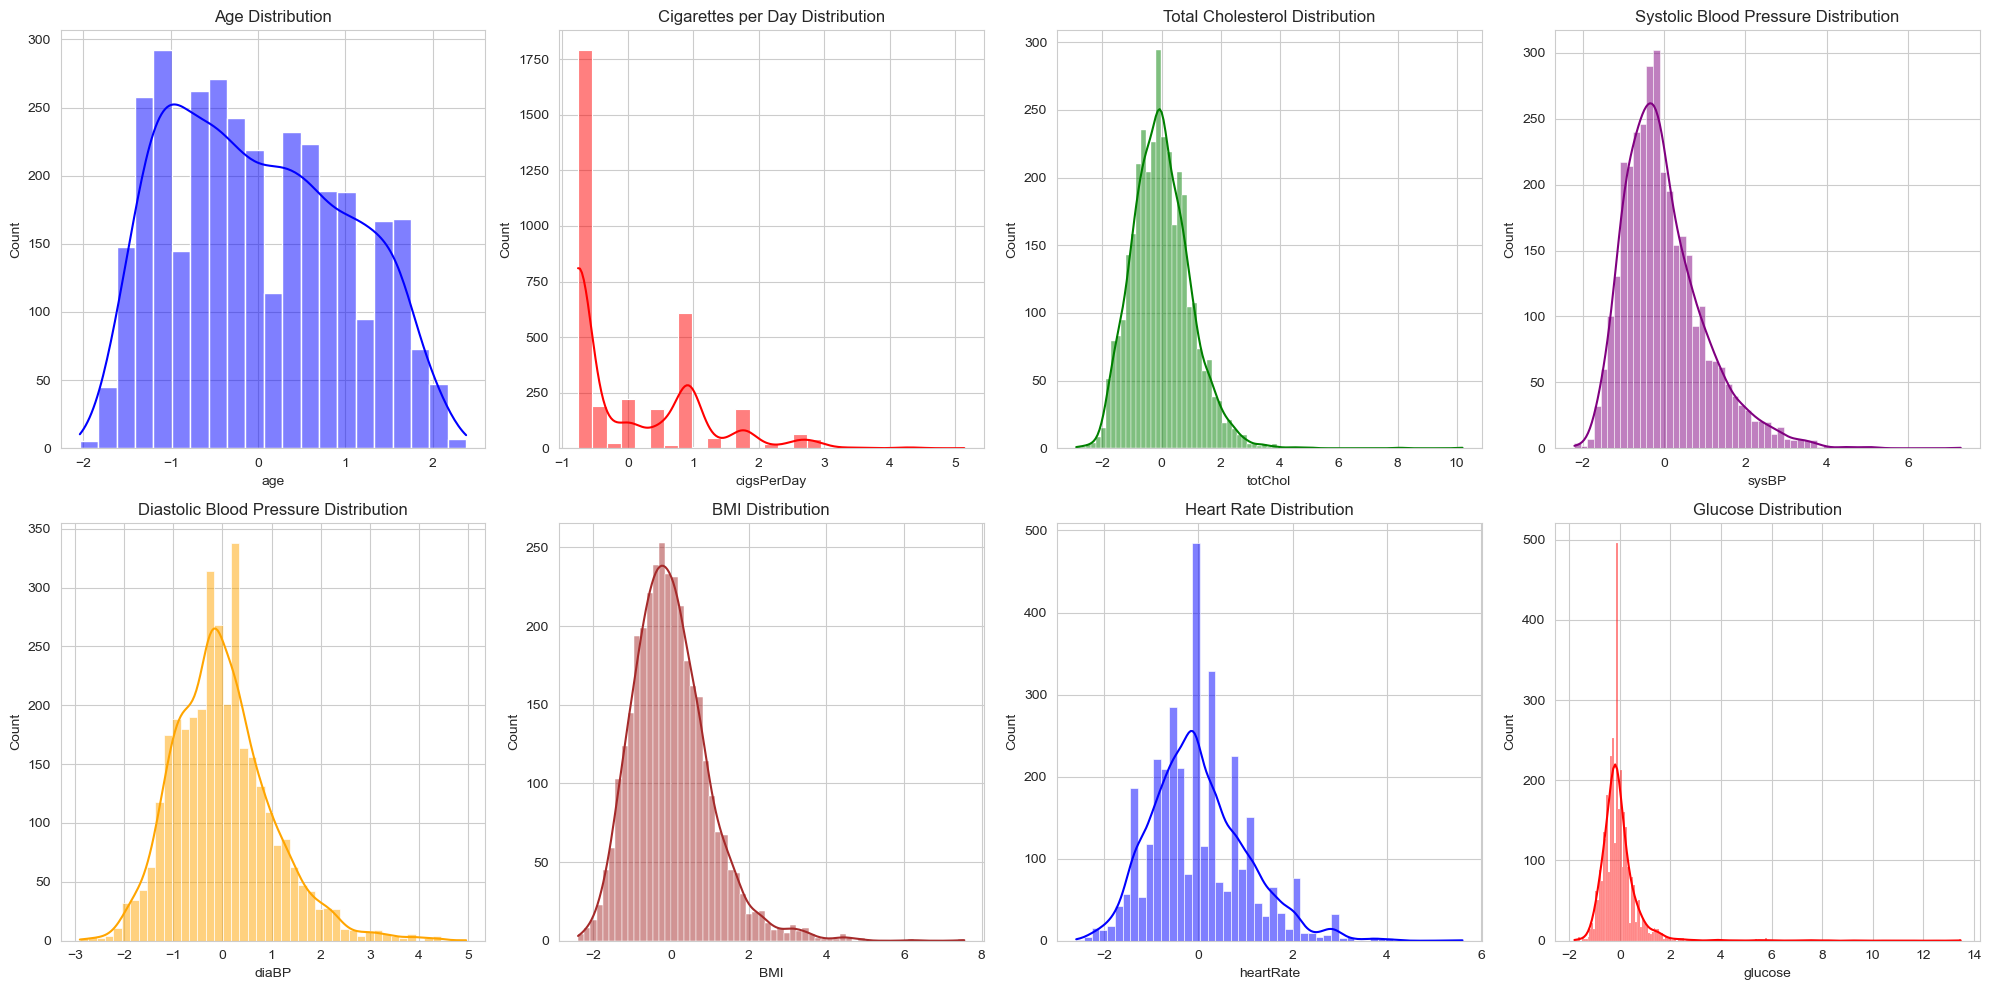

In [19]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for all plots
sns.set_style("whitegrid")

# Numerical Variables Distribution
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Plotting 'age'
sns.histplot(data=df_wrangled, x='age', kde=True, color='blue', ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

# Plotting 'cigsPerDay'
sns.histplot(data=df_wrangled, x='cigsPerDay', kde=True, color='red', ax=axes[0, 1])
axes[0, 1].set_title('Cigarettes per Day Distribution')

# Plotting 'totChol'
sns.histplot(data=df_wrangled, x='totChol', kde=True, color='green', ax=axes[0, 2])
axes[0, 2].set_title('Total Cholesterol Distribution')

# Plotting 'sysBP'
sns.histplot(data=df_wrangled, x='sysBP', kde=True, color='purple', ax=axes[0, 3])
axes[0, 3].set_title('Systolic Blood Pressure Distribution')

# Plotting 'diaBP'
sns.histplot(data=df_wrangled, x='diaBP', kde=True, color='orange', ax=axes[1, 0])
axes[1, 0].set_title('Diastolic Blood Pressure Distribution')

# Plotting 'BMI'
sns.histplot(data=df_wrangled, x='BMI', kde=True, color='brown', ax=axes[1, 1])
axes[1, 1].set_title('BMI Distribution')

# Plotting 'heartRate'
sns.histplot(data=df_wrangled, x='heartRate', kde=True, color='blue', ax=axes[1, 2])
axes[1, 2].set_title('Heart Rate Distribution')

# Plotting 'glucose'
sns.histplot(data=df_wrangled, x='glucose', kde=True, color='red', ax=axes[1, 3])
axes[1, 3].set_title('Glucose Distribution')

plt.tight_layout()
plt.show()


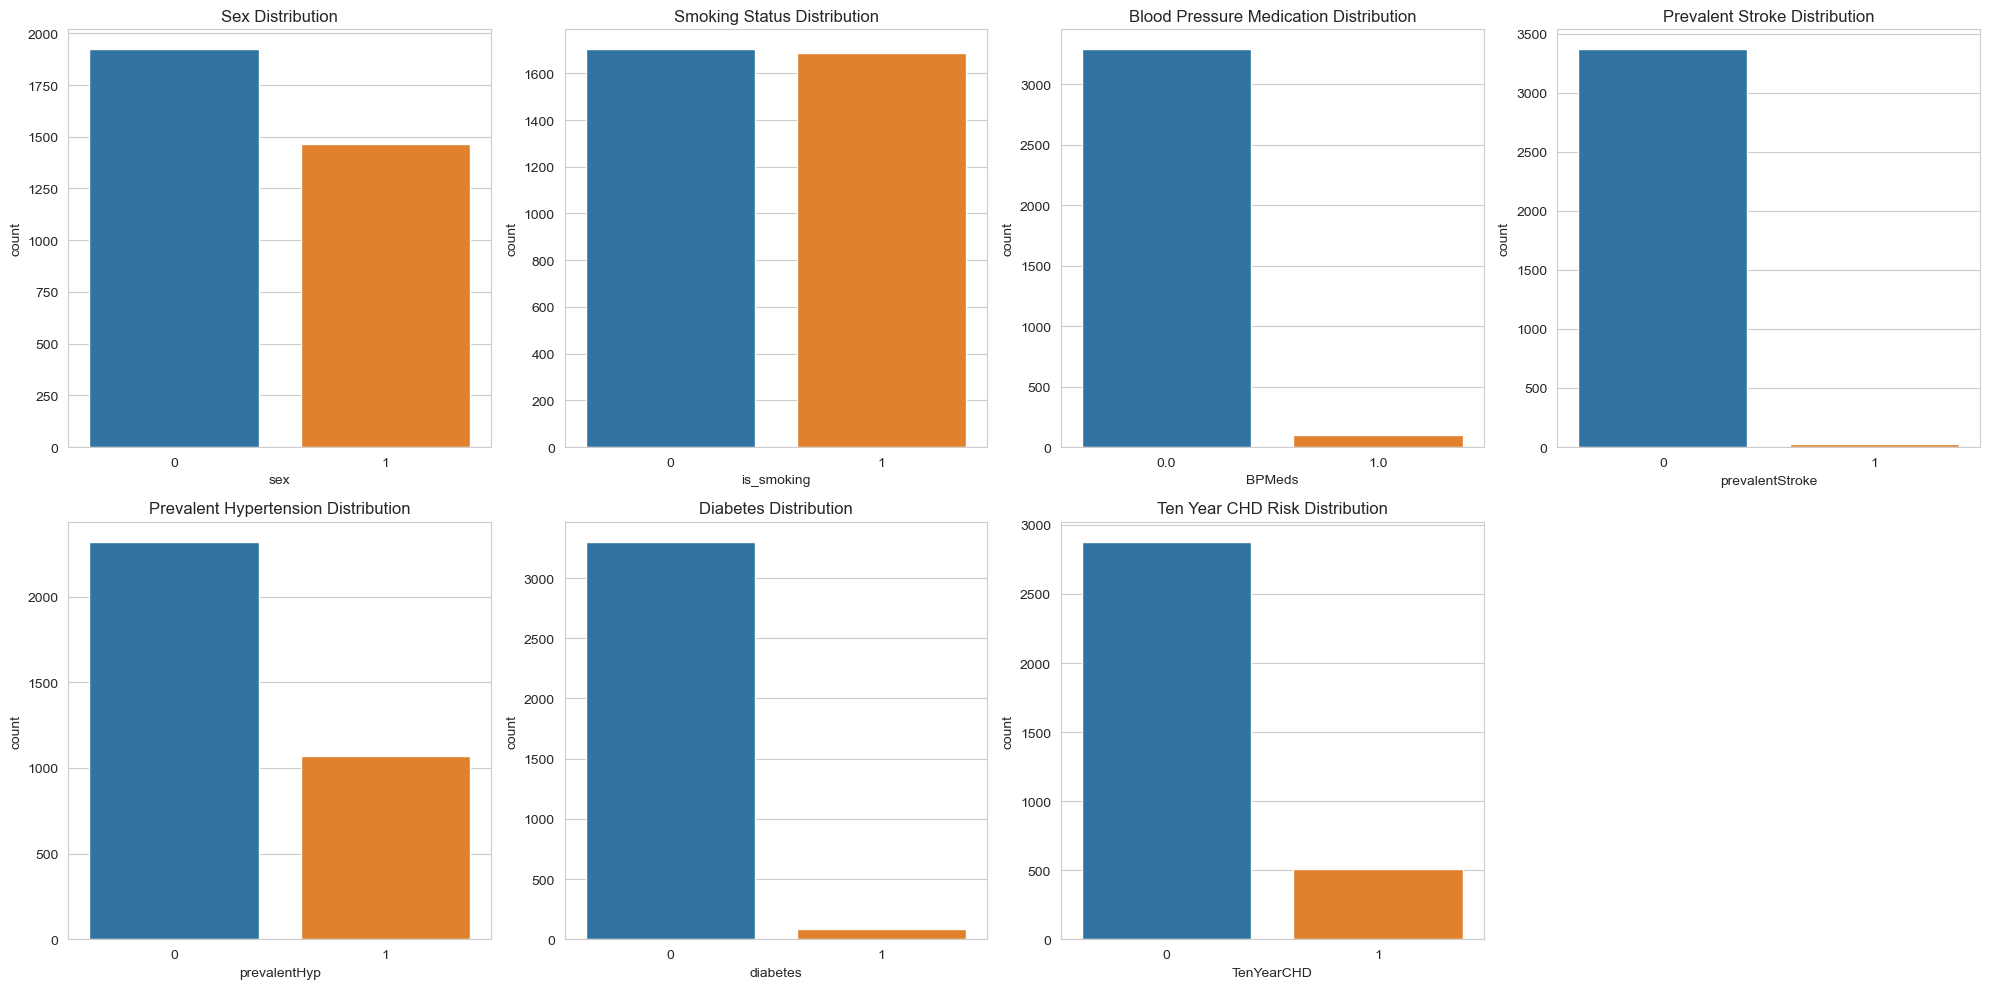

In [20]:
# Categorical Variables Distribution
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Plotting 'sex'
sns.countplot(data=df_wrangled, x='sex', ax=axes[0, 0])
axes[0, 0].set_title('Sex Distribution')

# Plotting 'is_smoking'
sns.countplot(data=df_wrangled, x='is_smoking', ax=axes[0, 1])
axes[0, 1].set_title('Smoking Status Distribution')

# Plotting 'BPMeds'
sns.countplot(data=df_wrangled, x='BPMeds', ax=axes[0, 2])
axes[0, 2].set_title('Blood Pressure Medication Distribution')

# Plotting 'prevalentStroke'
sns.countplot(data=df_wrangled, x='prevalentStroke', ax=axes[0, 3])
axes[0, 3].set_title('Prevalent Stroke Distribution')

# Plotting 'prevalentHyp'
sns.countplot(data=df_wrangled, x='prevalentHyp', ax=axes[1, 0])
axes[1, 0].set_title('Prevalent Hypertension Distribution')

# Plotting 'diabetes'
sns.countplot(data=df_wrangled, x='diabetes', ax=axes[1, 1])
axes[1, 1].set_title('Diabetes Distribution')

# Plotting 'TenYearCHD'
sns.countplot(data=df_wrangled, x='TenYearCHD', ax=axes[1, 2])
axes[1, 2].set_title('Ten Year CHD Risk Distribution')

fig.delaxes(axes[1][3])  # Delete empty subplot

plt.tight_layout()
plt.show()
